In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ishik\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
X= df.drop('Outcome',axis=1).values #independent feature
y=df['Outcome'].values #dependent feature

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [3]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://download.pytorch.org/whl/cu117



In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Creating tensors

In [7]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [8]:
df.shape

(768, 9)

# Creating model with Pytorch

In [13]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1= nn.Linear(input_features,hidden1)
        self.f_connected2= nn.Linear(hidden1,hidden2)
        self.out= nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [14]:
#instantiate the ANN model
torch.manual_seed(20)
model=ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

## Backward propagation

1. Define the loss function 
2. Define the optimizer

In [16]:
loss_function= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

In [22]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 0.11696050316095352
Epoch number: 11 and the loss: 0.11526599526405334
Epoch number: 21 and the loss: 0.11478094756603241
Epoch number: 31 and the loss: 0.11379946768283844
Epoch number: 41 and the loss: 0.11344440281391144
Epoch number: 51 and the loss: 0.11226808279752731
Epoch number: 61 and the loss: 0.11149615794420242
Epoch number: 71 and the loss: 0.1110636293888092
Epoch number: 81 and the loss: 0.11086079478263855
Epoch number: 91 and the loss: 0.11050331592559814
Epoch number: 101 and the loss: 0.10981879383325577
Epoch number: 111 and the loss: 0.1097818911075592
Epoch number: 121 and the loss: 0.1091768741607666
Epoch number: 131 and the loss: 0.10882363468408585
Epoch number: 141 and the loss: 0.10939323157072067
Epoch number: 151 and the loss: 0.10842086374759674
Epoch number: 161 and the loss: 0.10909217596054077
Epoch number: 171 and the loss: 0.11080287396907806
Epoch number: 181 and the loss: 0.1072007492184639
Epoch number: 191 and the l

## Plotting the loss function

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

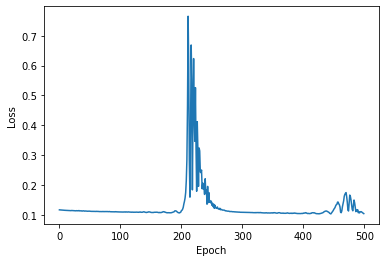

In [23]:
with torch.no_grad():
    plt.plot(range(epochs),final_losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

# Prediction in X_test data

In [28]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=(model(data))
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [29]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [30]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,predictions)
cm

array([[81, 26],
       [20, 27]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

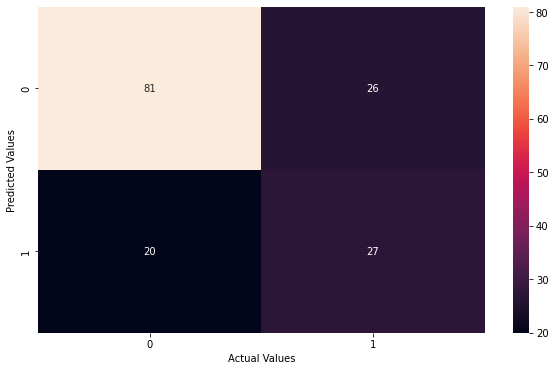

In [32]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [36]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,predictions)
score*100

70.12987012987013

In [37]:
#saving the model
torch.save(model,'diabetes.pt')

In [38]:
#loading the model
model=torch.load('diabetes.pt')
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [39]:
# Prediction on new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [40]:
#new data
list1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [41]:
new_data=torch.tensor(list1)

In [44]:
#predict new data using Pytorch

with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.3050, 1.9023])
1
